# 1. Introduction

This [dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) contain medical information of patients that can be used to predict if a patinet is more likely to have heart problem or not. We explore the dataset and classify the target variable using three different classifiers (LDA, QDA, and decision tree) to findout which algorithm is more suitable for this dataset.


# 2. Reading the Data

Read the heart.csv file using pandas.

In [11]:
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Read the data 
data = pd.read_csv('out_y_y2_4_13.csv')
data

,length,mean(absx),var(absx),.05 perc of np.log(xabsposmin+np.abs(x)),.1,.15,.2,.25,.3,.35,...,93ftrm,94ftrm,95ftrm,96ftrm,97ftrm,98ftrm,99ftrm,100ftrm,y,y2
0,49229,0.115520,0.019734,-6.408223,-5.506858,-4.891065,-4.428500,-4.034179,-3.716353,-3.455051,...,0.001256,0.001132,0.001096,0.001114,0.001159,0.001090,0.001093,0.001048,0.0,0.0
1,52616,0.099569,0.017016,-6.869160,-6.119745,-5.626037,-5.160460,-4.693234,-4.263685,-3.929420,...,0.000796,0.000863,0.000929,0.000940,0.000988,0.001006,0.000955,0.000905,0.0,0.0
2,54045,0.119582,0.020011,-6.479150,-5.759545,-5.289430,-4.862623,-4.458873,-4.049289,-3.709722,...,0.001166,0.001105,0.001088,0.001057,0.001049,0.000929,0.000870,0.000836,0.0,0.0
3,54298,0.093124,0.016129,-6.589181,-5.842684,-5.372923,-4.954524,-4.585883,-4.259348,-3.940342,...,0.001051,0.001015,0.000985,0.001049,0.001075,0.001095,0.001096,0.001064,0.0,0.0
4,50604,0.093275,0.015164,-7.216206,-6.463994,-5.965548,-5.426903,-4.843974,-4.314827,-3.946625,...,0.000622,0.000712,0.000784,0.000842,0.000842,0.000786,0.000715,0.000696,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,38994,0.108123,0.019588,-6.655378,-5.976260,-5.405585,-4.871058,-4.443510,-4.125888,-3.827481,...,0.002444,0.002397,0.002178,0.002095,0.002046,0.002040,0.002042,0.002141,14.0,8.0
671,42623,0.113282,0.021810,-6.956019,-6.282668,-5.760306,-5.186498,-4.692679,-4.307655,-3.936953,...,0.002712,0.002600,0.002692,0.002470,0.002357,0.002254,0.002191,0.002204,14.0,8.0
672,39657,0.100764,0.016750,-6.930506,-6.079307,-5.360054,-4.863696,-4.443884,-4.046617,-3.696439,...,0.002968,0.002853,0.002826,0.002837,0.002779,0.002640,0.002640,0.002573,14.0,8.0
673,54251,0.085553,0.017477,-7.974899,-7.339823,-6.954489,-6.606859,-6.315073,-6.011789,-5.566722,...,0.002695,0.002639,0.002419,0.002154,0.002050,0.002011,0.001977,0.002013,14.0,8.0


In [12]:
# visualize data

# parameters = data.columns

# for item in parameters:
    
#     sns.histplot(data=data, x=item)
#     plt.show()

## 2.1 Generate training and test samples

In [13]:
type(data)


pandas.core.frame.DataFrame

In [14]:

# np.random.seed(5)
# I=np.random.permutation(range(data.shape[0]))
# data2=data.loc[I]
# n=int(data2.shape[0]*.8)
# data2train=data2.iloc[:n].copy()
# data2test=data2.iloc[n:].copy()
# data2test.index=range(data2test.shape[0])

#y_pred

In [15]:
# data splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
ydata=data['y']
YT=data.loc[:,['y','y2']].copy()
X_train_0, X_test_0, y_train, y_test =train_test_split(data, ydata, test_size=0.20, random_state = 609)
X_train=X_train_0.drop(['y','y2'], axis=1)
X_test=X_test_0.drop(['y','y2'], axis=1)
y = X_test_0["y"].astype('int')
y2= X_test_0["y2"].astype('int')

#standarize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
le = LabelEncoder()
y_train = le.fit_transform(y_train)
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X = X_train,y =  y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
y_pred = le.inverse_transform(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy=accuracy_score(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=classifier.classes_)
# disp.plot()
# plt.show()


[[ 3  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 11  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  0  0  1  0  0  0]
 [ 0  0  0  1  0  0  0  0  5  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0 10  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 12]]


In [17]:
accuracy

0.9259259259259259

Feature: 0, Score: 0.00569
Feature: 1, Score: 0.01269
Feature: 2, Score: 0.00112
Feature: 3, Score: 0.00550
Feature: 4, Score: 0.00121
Feature: 5, Score: 0.00092
Feature: 6, Score: 0.00351
Feature: 7, Score: 0.00226
Feature: 8, Score: 0.00235
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.01805
Feature: 11, Score: 0.00019
Feature: 12, Score: 0.00319
Feature: 13, Score: 0.00478
Feature: 14, Score: 0.00441
Feature: 15, Score: 0.00255
Feature: 16, Score: 0.00709
Feature: 17, Score: 0.00439
Feature: 18, Score: 0.01042
Feature: 19, Score: 0.00339
Feature: 20, Score: 0.00976
Feature: 21, Score: 0.00992
Feature: 22, Score: 0.00185
Feature: 23, Score: 0.00100
Feature: 24, Score: 0.00031
Feature: 25, Score: 0.00026
Feature: 26, Score: 0.00121
Feature: 27, Score: 0.00083
Feature: 28, Score: 0.00027
Feature: 29, Score: 0.00067
Feature: 30, Score: 0.00019
Feature: 31, Score: 0.00731
Feature: 32, Score: 0.00016
Feature: 33, Score: 0.00004
Feature: 34, Score: 0.00156
Feature: 35, Score: 0.00491
Fe

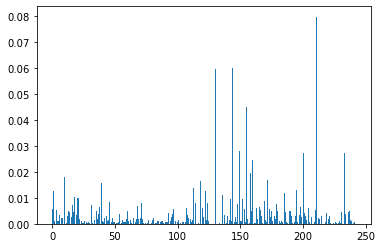

In [18]:
# get importance
importance = classifier.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [19]:
newdf=pd.DataFrame({'col_name':importance}, index=data.columns[:-2]).sort_values(by='col_name', ascending=False)

In [20]:
newdf[:20]

,col_name
69ftrm,0.079736
2ftrm,0.059863
.35ft,0.059728
13ftrm,0.044879
7ftrm,0.027859
58ftrm,0.027380
91ftrm,0.027312
18ftrm,0.024496
16ftrm,0.019481
.4,0.018053


In [21]:
import numpy as np
np.set_printoptions(linewidth=200)  # default 75

In [22]:
print(newdf.index[:150])

Index(['69ftrm', '2ftrm', '.35ft', '13ftrm', '7ftrm', '58ftrm', '91ftrm',
       '18ftrm', '16ftrm', '.4',
       ...
       '8ftrm', '97ftrm', '34ftrm', '2rm', '66rm', '40rm', '.15', '19rm',
       '20rm', '42ftrm'],
      dtype='object', length=150)


In [23]:
newdfind=newdf.index[:150]

In [24]:
X_train=X_train_0[[newdfind]]
X_test=X_test_0[[newdfind]]

KeyError: "None of [Index([('69ftrm', '2ftrm', '.35ft', '13ftrm', '7ftrm', '58ftrm', '91ftrm', '18ftrm', '16ftrm', '.4', '30ftrm', '97rm', '18rm', '92rm', '53ftrm', 'mean(absx)', 'mean(ftabs)', '43ftrm', '.65ft', '.8', '.95', '.9', '10ftrm', '.95ft', '27ftrm', '25rm', '50rm', '93rm', '.05 perc of np.log(ftabsposmin+ftabs)', '37ftrm', '6ftrm', '10rm', '.7', '47rm', '23ftrm', '17rm', '56ftrm', '99rm', '21ftrm', '62ftrm', '86rm', '76rm', 'length', '31ftrm', '11ftrm', '.05 perc of np.log(xabsposmin+np.abs(x))', '24ftrm', '68ftrm', '38ftrm', '17ftrm', '39rm', '14rm', '47ftrm', '95ftrm', '48ftrm', '33ftrm', '.55', '89ftrm', '94ftrm', '44ftrm', '.6', '.75', '59ftrm', '77ftrm', '72rm', '92ftrm', '16rm', '75rm', '33rm', '.2', '.85', '87rm', '.7ft', '55ftrm', '.85ft', '.5', '49ftrm', '73ftrm', '25ftrm', '52ftrm', '79ftrm', '22rm', '35ftrm', '60ftrm', '57ftrm', '4ftrm', '32ftrm', '100rm', '65ftrm', '.65', '74rm', '27rm', '.3', '60rm', '44rm', '49rm', '.25', '88rm', '21rm', '70ftrm', ...)], dtype='object')] are in the [columns]"

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
le = LabelEncoder()
y_train = le.fit_transform(y_train)
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X = X_train,y =  y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
y_pred = le.inverse_transform(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy=accuracy_score(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=classifier.classes_)
# disp.plot()
print(accuracy)

[[ 3  0  0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  7  0  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 12]]
0.9259259259259259


In [97]:
d=pd.DataFrame({'y':y,"y2":y2,"ypred":y_pred})
tf=d.y==d.ypred
lst=[]
for i in range(9):

    lst.append(d.loc[tf&(y2==i)].shape[0]/d.loc[y2==i].shape[0])
print(lst)
label_acc=[]
for i in range(15):
    label_acc.append(np.sum((y_pred[y_test==i]==y_test[y_test==i]))/len(y_test[y_test==i]))
print(label_acc)
dout1=pd.DataFrame({'xgb':lst})
dout2=pd.DataFrame({'xgb':label_acc})

[0.9285714285714286, 0.8421052631578947, 0.8235294117647058, 0.9411764705882353, 0.8, 0.7647058823529411, 0.8571428571428571, 0.9285714285714286, 0.9230769230769231]
[0.75, 0.8333333333333334, 0.9411764705882353, 1.0, 0.9090909090909091, 1.0, 0.6, 0.875, 0.8333333333333334, 1.0, 0.8, 0.6666666666666666, 1.0, 0.8333333333333334, 0.9166666666666666]


# Instructions for Sections 2.2 - 2.8:

Implement the classification algorithm using built-in functions in sklearn. Train the model using the training data and then test it using the test data. Show a confusion matrix to show the true-positives, false-positives, false-negatives and true-negatives when the trained model is applied to the test data. 

## 2.2 Linear Discriminant Analysis Classifier

In [48]:
print(len(y_pred),len(y_test))

135 135


In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

# LDA fit
m1 = 'Linear Discriminant Analysis'

lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
lda_y_predicted = lda.fit(X_train, y_train).predict(X_test)

# get the accuracy score
lda_accuraccy_score = accuracy_score(y_test, lda_y_predicted)
print(f'Accuracy of Linear Discriminant Analysis is {lda_accuraccy_score*100:.4f}%')
print(lda_y_predicted)

Accuracy of Linear Discriminant Analysis is 90.3704%
[14  2  2  8  5  4  6  4 12  4  2  9 13  3  6  2  7  1 12  1  9  2 14 14
  5  5 14 13  9  2 13  1  5 13 10  6  4 14  6 10  2  4  4  1 10 10  1  6
 13  2  2  4  2 12  0 13  6 12 14 12  4 12 10 11  4  4  8 13  0  6  4 10
  1  5  0  7  6 13  2 10 13  7  9 10  2  2  9 10 14  1 12 14 14  2  0  1
  2  5  4  1  8  2  3 11  7  3 13  3  2 14  4  9  7 11 13  7  9 10  6  7
  3 14  5 11  5  1 14 11  9  1 14  1 12 13  7]


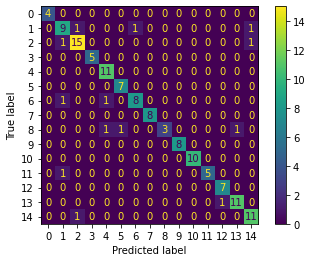

In [50]:
# get the confusion matrix
lda_conf_matrix = confusion_matrix(y_test, lda_y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=lda_conf_matrix,display_labels=lda.classes_)
disp.plot()
plt.show()

In [54]:
y_pred=lda_y_predicted

d=pd.DataFrame({'y':y,"y2":y2,"ypred":y_pred})
tf=d.y==d.ypred
lst=[]
for i in range(9):

    lst.append(d.loc[tf&(y2==i)].shape[0]/d.loc[y2==i].shape[0])
print(lst)
label_acc=[]
for i in range(15):
    label_acc.append(np.sum((y_pred[y_test==i]==y_test[y_test==i]))/len(y_test[y_test==i]))
print(label_acc)
dout1['lda']=lst
dout2['lda']=label_acc

[0.9285714285714286, 0.8947368421052632, 0.8823529411764706, 1.0, 1.0, 0.7647058823529411, 1.0, 0.8571428571428571, 0.8461538461538461]
[1.0, 0.75, 0.8823529411764706, 1.0, 1.0, 1.0, 0.8, 1.0, 0.5, 1.0, 1.0, 0.8333333333333334, 1.0, 0.9166666666666666, 0.9166666666666666]


In [56]:
dout2

,xgb,lda
0,1.000000,1.000000
1,0.750000,0.750000
2,0.882353,0.882353
3,1.000000,1.000000
4,1.000000,1.000000
5,1.000000,1.000000
6,0.800000,0.800000
7,1.000000,1.000000
8,0.500000,0.500000
9,1.000000,1.000000


## 2.2 Quadratic Discriminant Analysis Classifier

C:\Users\nibaf\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy of Quadratic Discriminant Analysis is 13.3333%


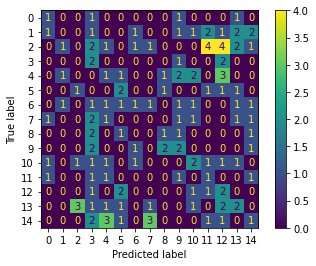

In [28]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

#accuracy_score,roc_curve,classification_report
m2 = 'Quadratic Discriminant Analysis'

qda = qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda_y_predicted = qda.fit(X_train, y_train).predict(X_test)


# get the accuracy score
qda_accuraccy_score = accuracy_score(y_test, qda_y_predicted)
print(f'Accuracy of Quadratic Discriminant Analysis is {qda_accuraccy_score*100:.4f}%')

# get the confusion matrix
qda_conf_matrix = confusion_matrix(y_test, qda_y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=qda_conf_matrix,display_labels=qda.classes_)
disp.plot()
plt.show()


## 2.4 Decision Tree Classifier

Accuracy of DecisionTreeClassifier: 70.3704%


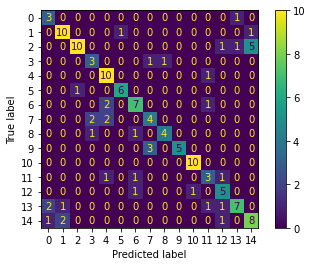

In [30]:
from sklearn.tree import DecisionTreeClassifier

m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 20)
dt.fit(X_train, y_train)
dt_y_predicted = dt.predict(X_test)


# get the accuracy score
dt_acc_score = accuracy_score(y_test, dt_y_predicted)
print(f'Accuracy of DecisionTreeClassifier: {dt_acc_score*100:.4f}%')

# confusion matrix
dt_conf_matrix = confusion_matrix(y_test, dt_y_predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=dt_conf_matrix,display_labels=dt.classes_)
disp.plot()
plt.show()



## 2.5 Logistic Regression

C:\Users\nibaf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of LogisticRegression: 89.6296%


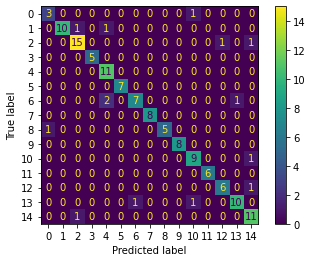

In [31]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr_y_predicted = lr.predict(X_test)


# get the accuracy score
lr_acc_score = accuracy_score(y_test, lr_y_predicted)
print(f'Accuracy of LogisticRegression: {lr_acc_score*100:.4f}%')

# confusion matrix
lr_conf_matrix = confusion_matrix(y_test, lr_y_predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=lr_conf_matrix,display_labels=lr.classes_)
disp.plot()
plt.show()


## 2.6 Random Forest

Accuracy of LogisticRegression: 91.8519%


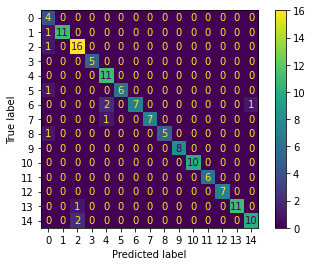

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=50, random_state=0)
rfc.fit(X_train, y_train)

rfc_y_predicted = rfc.predict(X_test)


# get the accuracy score
rfc_acc_score = accuracy_score(y_test, rfc_y_predicted)
print(f'Accuracy of LogisticRegression: {rfc_acc_score*100:.4f}%')

# confusion matrix
rfc_conf_matrix = confusion_matrix(y_test, rfc_y_predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=rfc_conf_matrix,display_labels=rfc.classes_)
disp.plot()
plt.show()

In [57]:
y_pred=rfc_y_predicted

d=pd.DataFrame({'y':y,"y2":y2,"ypred":y_pred})
tf=d.y==d.ypred
lst=[]
for i in range(9):

    lst.append(d.loc[tf&(y2==i)].shape[0]/d.loc[y2==i].shape[0])
print(lst)
label_acc=[]
for i in range(15):
    label_acc.append(np.sum((y_pred[y_test==i]==y_test[y_test==i]))/len(y_test[y_test==i]))
print(label_acc)
dout1['rfc']=lst
dout2['rfc']=label_acc

[0.8571428571428571, 0.9473684210526315, 0.8823529411764706, 1.0, 0.9, 0.8235294117647058, 0.9285714285714286, 1.0, 0.9230769230769231]
[1.0, 0.9166666666666666, 0.9411764705882353, 1.0, 1.0, 0.8571428571428571, 0.7, 0.875, 0.8333333333333334, 1.0, 1.0, 1.0, 1.0, 0.9166666666666666, 0.8333333333333334]


## 2.7 Support Vector Machine

Accuracy of LogisticRegression: 95.5556%


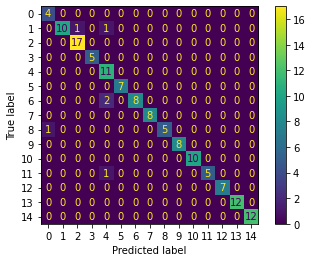

In [60]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=3)
svm.fit(X_train, y_train)

svm_y_predicted = svm.predict(X_test)


# get the accuracy score
svm_acc_score = accuracy_score(y_test, svm_y_predicted)
print(f'Accuracy of LogisticRegression: {svm_acc_score*100:.4f}%')

# confusion matrix
svm_conf_matrix = confusion_matrix(y_test, svm_y_predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=svm_conf_matrix,display_labels=svm.classes_)
disp.plot()
plt.show()

In [61]:
y_pred=svm_y_predicted

d=pd.DataFrame({'y':y,"y2":y2,"ypred":y_pred})
tf=d.y==d.ypred
lst=[]
for i in range(9):

    lst.append(d.loc[tf&(y2==i)].shape[0]/d.loc[y2==i].shape[0])
print(lst)
label_acc=[]
for i in range(15):
    label_acc.append(np.sum((y_pred[y_test==i]==y_test[y_test==i]))/len(y_test[y_test==i]))
print(label_acc)

[0.8571428571428571, 1.0, 0.8823529411764706, 1.0, 1.0, 0.8823529411764706, 1.0, 1.0, 1.0]
[1.0, 0.8333333333333334, 1.0, 1.0, 1.0, 1.0, 0.8, 1.0, 0.8333333333333334, 1.0, 1.0, 0.8333333333333334, 1.0, 1.0, 1.0]


In [62]:
dout1['svm']=lst
dout2['svm']=label_acc

In [73]:

dout1.round(decimals=2).to_csv('dout1.csv',index=True)

In [74]:
dout2.round(decimals=2).to_csv('dout2.csv',index=True)

## 2.8 Naive Bayes

Accuracy of LogisticRegression: 61.4815%


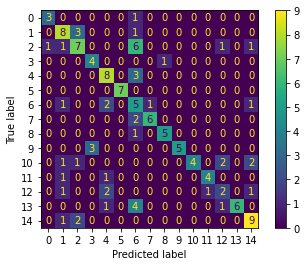

In [36]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)
nb_y_predicted = nb.predict(X_test)

nb_conf_matrix = confusion_matrix(y_test, nb_y_predicted)
nb_acc_score = accuracy_score(y_test, nb_y_predicted)


print(f'Accuracy of LogisticRegression: {nb_acc_score*100:.4f}%')

# confusion matrix
nb_conf_matrix = confusion_matrix(y_test, nb_y_predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=nb_conf_matrix,display_labels=nb.classes_)
disp.plot()
plt.show()

## 2.9 Reciver Operating Characterstic Curve

Plot the reciever operating curve (True Positive Rate vs False Positve Rate ) for each method

In [ ]:
from sklearn.metrics import roc_curve



lda_predicted_probability_of_positive = lda.predict_proba(X_test)[:,1]
qda_predicted_probability_of_positive = qda.predict_proba(X_test)[:,1]
dt_predicted_probability_of_positive = dt.predict_proba(X_test)[:,1]
lr_predicted_probability_of_positive = lr.predict_proba(X_test)[:,1]
rfc_predicted_probability_of_positive = rfc.predict_proba(X_test)[:,1]
svm_predicted_decision_function = svm.decision_function(X_test)
nb_predicted_probability_of_positive = nb.predict_proba(X_test)[:,1]


lda_false_positive_rate,lda_true_positive_rate,lda_threshold = roc_curve(y_test,lda_predicted_probability_of_positive)
qda_false_positive_rate,qda_true_positive_rate,qda_threshold = roc_curve(y_test,qda_predicted_probability_of_positive)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted_probability_of_positive)
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predicted_probability_of_positive)
rfc_false_positive_rate,rfc_true_positive_rate,rfc_threshold = roc_curve(y_test,rfc_predicted_probability_of_positive)
svm_false_positive_rate,svm_true_positive_rate,svm_threshold = roc_curve(y_test,svm_predicted_decision_function)
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nb_predicted_probability_of_positive)


#sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lda_false_positive_rate,lda_true_positive_rate,label='Linear Discriminant Analysis')
plt.plot(qda_false_positive_rate,qda_true_positive_rate,label='Quadratic Discriminant Analysis')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Decesion Tree')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(rfc_false_positive_rate,rfc_true_positive_rate,label='Random Forest')
plt.plot(svm_false_positive_rate,svm_true_positive_rate,label='SVM')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')


plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()